# Predicting House Sale Prices

In this project, we are going to take the housing data from the city of Ames, Iowa, United States from 2006-2010 and try to predict the house sale prices.

Information of the different columns or features can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt)

# Data Collection

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

ameshousing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
ameshousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
ameshousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

# Feature Engineering

In [3]:
def transform_features(df):
    
    #Get rid of any columns with 15% or more missing values
    missing_cols_pct = df.isnull().sum()/df.shape[0]
    clean_cols = missing_cols_pct[missing_cols_pct>0.15].index
    clean_df = df.drop(columns = clean_cols)
   
    #fill in integer data that have 6% or less missing values with the mode 
    missing_cols_clean = clean_df.select_dtypes(include = ['int','float']).isnull().sum()/clean_df.shape[0]
    fill_cols = missing_cols_clean[(missing_cols_clean<0.06)&(missing_cols_clean>0)].index
    
    for c in fill_cols:
        clean_df[c] = clean_df[c].fillna(clean_df[c].mode()[0])
    
    #Add years between house built and remodel, Yr sold and Garage Yr Blt
    clean_df['years_til_sold'] = clean_df['Yr Sold'] - clean_df['Year Built']
    clean_df['years_til_remod'] = clean_df['Year Remod/Add'] - clean_df['Year Built']
    clean_df['years_till_garage'] = clean_df['Garage Yr Blt'] - clean_df['Year Built']
    #drop the three columns
    clean_df = clean_df.drop(columns = ['Year Remod/Add','Year Built', 'Garage Yr Blt'])
    clean_df = clean_df[(clean_df['years_til_remod']>=0) & (clean_df['years_til_sold'] >=0)]
    
        
    #Going to drop columns that relate or is irrelevent to SalePrice 
    clean_df = clean_df.drop(columns=['Order', 'PID','Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'])
    
#     #Create dummy variables for categories
#     category_cols = clean_df.select_dtypes(include = 'object').columns
    
#     for c in category_cols:
#         dummy = pd.get_dummies(clean_df[c])
#         clean_df = pd.concat([clean_df, dummy], axis=1)
#         clean_df = clean_df.drop(columns = c)
    
    return clean_df

In [4]:
transform_df = transform_features(ameshousing)

transform_df.select_dtypes(include = ['float','int']).isnull().sum() #Check if there are any null values in our numeric fields

MS SubClass          0
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area         0
BsmtFin SF 1         0
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
Bsmt Half Bath       0
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
years_til_sold       0
years_til_remod      0
years_till_garage    0
dtype: int64

No missing values for all integer and floats - a good sign

# Feature Selection

Next, we are going to find out which numerical features correlate with SalePrice the most

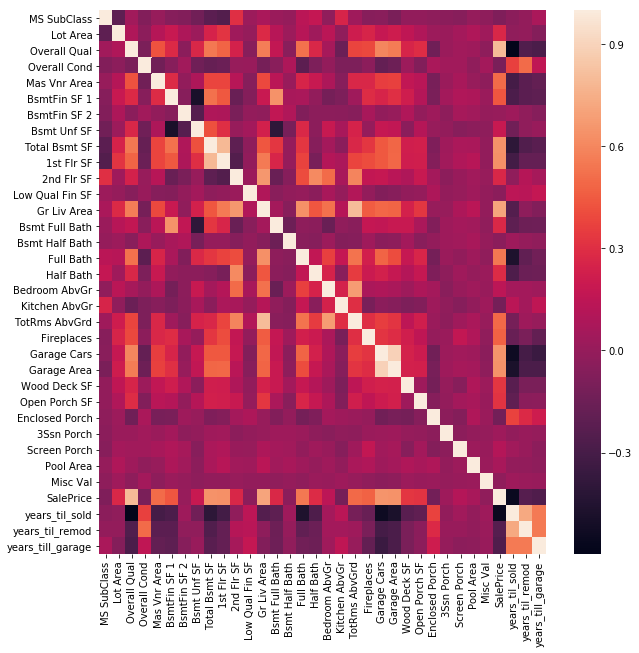

In [5]:
#Take test from earlier
fig, ax = plt.subplots(figsize = (10,10))

numerical = transform_df.select_dtypes(include = ['int','float'])
sns.heatmap(numerical.corr())

Let's see the detail

In [6]:
numerical.corr()['SalePrice'].abs().sort_values()

BsmtFin SF 2         0.006050
Misc Val             0.019295
3Ssn Porch           0.032236
Bsmt Half Bath       0.035934
Low Qual Fin SF      0.037649
Pool Area            0.068411
MS SubClass          0.085020
Overall Cond         0.101652
Screen Porch         0.112187
Kitchen AbvGr        0.119795
Enclosed Porch       0.128756
Bedroom AbvGr        0.143939
Bsmt Unf SF          0.183447
years_til_remod      0.240133
years_till_garage    0.259912
Lot Area             0.267122
2nd Flr SF           0.269518
Bsmt Full Bath       0.275820
Half Bath            0.285217
Open Porch SF        0.315141
Wood Deck SF         0.327790
BsmtFin SF 1         0.437732
Fireplaces           0.475073
TotRms AbvGrd        0.497966
Mas Vnr Area         0.505564
Full Bath            0.545641
years_til_sold       0.559042
1st Flr SF           0.632531
Garage Area          0.641184
Total Bsmt SF        0.641701
Garage Cars          0.648071
Gr Liv Area          0.712893
Overall Qual         0.800279
SalePrice 

Let's choose an arbitrary threshold of 0.4 correlation to use for our selection features (for now)

In [7]:
select_columns = numerical.corr()['SalePrice'].abs().sort_values()
select_columns = select_columns[select_columns>=0.4].index
select_columns

Index(['BsmtFin SF 1', 'Fireplaces', 'TotRms AbvGrd', 'Mas Vnr Area',
       'Full Bath', 'years_til_sold', '1st Flr SF', 'Garage Area',
       'Total Bsmt SF', 'Garage Cars', 'Gr Liv Area', 'Overall Qual',
       'SalePrice'],
      dtype='object')

Next, for our categorical columns we will determine if its:<br>
1) in our transform_df <br>
2) how many unique values there are within each column and drop an arbitrary unique values

In [9]:
#nominal columns
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

transform_df_nominal = []

for c in nominal_features:
    if c in transform_df:
        transform_df_nominal.append(c)

In [10]:
transform_df_nominal

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type']

In [11]:
for c in transform_df_nominal:
    if len(transform_df[c].unique()) > 10:
        transform_df = transform_df.drop(columns = c)

Next we will take the object columns thats left and create dummy variables

In [12]:
cols = transform_df.select_dtypes(include = 'object').columns

for c in cols:
    transform_df[c].astype('category', inplace = True)
    transform_df = pd.concat([transform_df, pd.get_dummies(transform_df[c])], axis = 1)
    transform_df.drop(columns = c, inplace = True)
    

We will add this to our select_features() function

In [13]:
def select_features(df, corr_threshold = 0.4, unique_threshold = 10):
    
    numerical = df.select_dtypes(include = ['int','float'])
    select_columns = numerical.corr()['SalePrice'].abs().sort_values()
    select_columns = select_columns[select_columns<corr_threshold].index
    
    df = df.drop(columns = select_columns)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

    df_nominal = []

    for c in nominal_features:
        if c in df:
            df_nominal.append(c)
            
    for c in df_nominal:
        if len(df[c].unique()) > unique_threshold:
            df = df.drop(columns = c)
            
    cols = df.select_dtypes(include = 'object').columns

    for c in cols:
        df[c].astype('category', inplace = True)
        df = pd.concat([df, pd.get_dummies(df[c])], axis = 1)
        df.drop(columns = c, inplace = True)
        
    return df

# Train and Test

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def train_and_test(df, k = 0):
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        #exclude target column (SalePrice)
        train_feature = df.drop(columns = 'SalePrice')
        #only select numerical columns
        train_numerical_cols = train_feature.columns

        #Instantiate Linear Regression Model
        lr = LinearRegression()
        #Train Features
        lr.fit(train[train_numerical_cols], train['SalePrice'])
        #Test it and get prediction
        prediction = lr.predict(test[train_numerical_cols])

        #Calculate the RMSE between the predicted and actual
        rmse = mean_squared_error(prediction, test['SalePrice'])**(1/2)
        
        return rmse
        
    if k == 1:
        shuffled_df = df.sample(frac=1)
        
        train = shuffled_df[:1460]
        test = shuffled_df[1460:]

        train_feature = df.drop(columns = 'SalePrice')
        train_numerical_cols = train_feature.columns

        lr = LinearRegression()
        
        lr.fit(train[train_numerical_cols], train['SalePrice'])
        prediction_one = lr.predict(test[train_numerical_cols])
        rmse_one = mean_squared_error(prediction_one, test['SalePrice'])**(1/2)
        
        lr.fit(test[train_numerical_cols], test['SalePrice'])
        prediction_two = lr.predict(train[train_numerical_cols])
        rmse_two = mean_squared_error(prediction_two, train['SalePrice'])**(1/2)
        
        print(rmse_one, rmse_two)
        return np.mean([rmse_one,rmse_two])
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            train_feature = train.drop(columns = 'SalePrice')
            train_numerical_cols = train_feature.columns
            
            lr = LinearRegression()
            lr.fit(train[train_numerical_cols], train['SalePrice'])
            prediction = lr.predict(test[train_numerical_cols])
            rmse = mean_squared_error(prediction, test['SalePrice'])**(1/2)
            rmse_values.append(rmse)
            print(rmse)
            
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [15]:
transform_df = transform_features(ameshousing)
select_df = select_features(transform_df)

In [16]:
print(train_and_test(select_df, k=0))
print('\n')
print(train_and_test(select_df, k=1))
print('\n')
print(train_and_test(select_df, k=5))

34903.326680298145


25353.870813187677 35010.846662764416
30182.358737976047


40952.20760519567
23800.388183103227
26856.8728177348
26992.821015582198
29095.923296974815
29539.642583718145


# Model Evaluation

In [67]:
from sklearn.model_selection import train_test_split

X = select_df.drop(columns = 'SalePrice')
y = select_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

prediction = lr.predict(X_test)

actual_vs_predicted = pd.DataFrame({'actual': y_test, 'predicted': prediction})

Next, we will take a random sample of 20 to see how our prediction performed

In [69]:
actual_vs_predicted.shape

(732, 2)

In [70]:
randint = np.random.randint(732, size = 20)

sample_df = actual_vs_predicted.iloc[randint]
sample_df.head()

,actual,predicted
2727,225000,248410.852966
4,189900,183606.357093
1864,240050,243924.683720
2702,125000,106993.099085
1489,165000,140207.042709


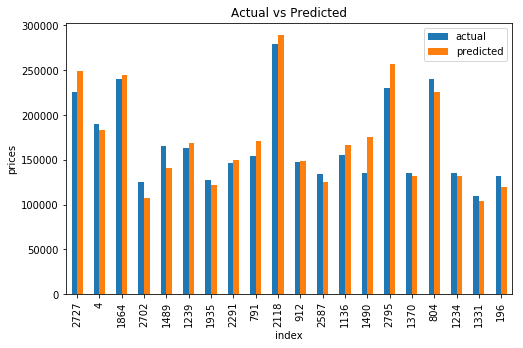

In [72]:
# Create subplots for figure size
fig, ax = plt.subplots(figsize = (8,5))
sample_df.plot(y=['actual','predicted'], kind = 'bar', ax=ax)
# Set title
plt.title('Actual vs Predicted')
# Set x label
plt.xlabel('index')
# Set y Label
plt.ylabel('prices')

plt.show()

For the most part, we see some similarities with cases where there are a lot of variance.

Let's see how the whole dataset performed using a scatter plot

Text(0,0.5,'Predicted')

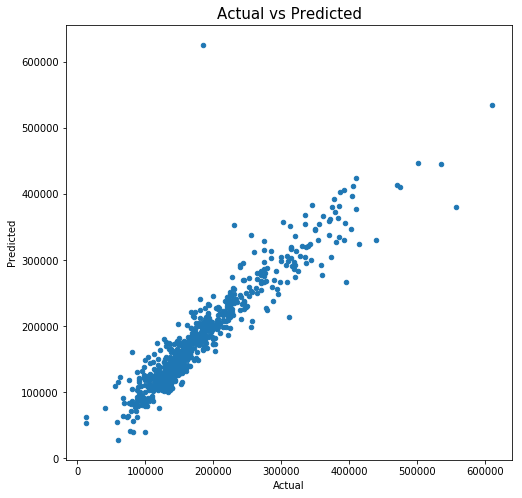

In [78]:
fig,ax = plt.subplots(figsize = (8,8))
actual_vs_predicted.plot(x='actual', y ='predicted', kind = 'scatter', ax=ax)

plt.title('Actual vs Predicted', fontsize = 15)
plt.xlabel('Actual')
plt.ylabel('Predicted')

For the most part, it looks like the data is trending upwards with a few outliers (one big one near 200000).

To truely test if our model performed accurately, let's plot out a residual histogram

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


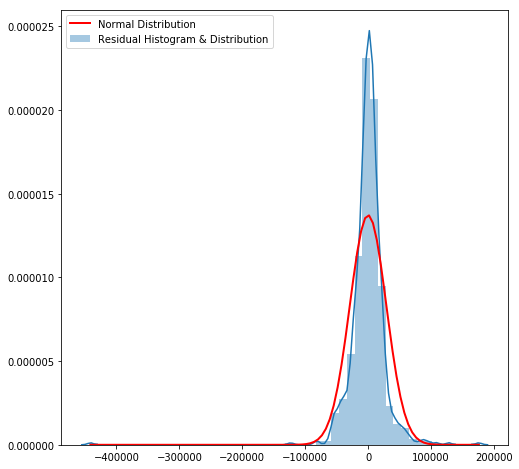

In [84]:
residual = actual_vs_predicted['actual'] - actual_vs_predicted['predicted']

from scipy.stats import norm

# Fit a normal distribution
mu, std = norm.fit(residual)

fig, ax = plt.subplots(figsize = (8,8))

ax = sns.distplot(residual, label= 'Residual Histogram & Distribution')

# Calculate the pdf         
x = np.linspace(min(residual), max(residual), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

It looks like most of the residual values fall within 0 (normally distributed) with a left tail.

# Error Metric Evaluation

Here, we will calculate MAE, MSE, RMSE.
    - These are cost functions that we want to minimize

In [86]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 16875.73241522257
Mean Squared Error: 844724860.6352427
Root Mean Squared Error: 29064.150781250133


# Accuracy Evaluation Metric

We will use the **coefficient of determination** to validate our accuracy

In [90]:
print('R2: ', metrics.r2_score(y_test, prediction))

R2:  0.8640769565382113


We have a 86% accuracy rate
    - This means that our model accounts for 86% of the difference between our predicted and actual prices 
    
In my humble opinion, that is pretty good!